to do:

como calcular a empirica: falar um pouco mais do KDE

IC
bootstrap

teste de hipotese toy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import math

pd.set_option('display.max_columns', None)

In [2]:
X1 = np.round(np.random.RandomState(42).normal(1.73,0.1,size=300), 2)

___

# Inferência Estatística

**Inferência Estatística**: o processo de tirar conclusões sobre informações populacionais (ou seja, informações da variável aleatória $X$) a partir de uma amostra da população.

Imagine um cenário prático real. Suponha que estamos interessados em estimar a altura média da população brasileira. Poderíamos dar um jeito de registrar todos os mais de 200 milhões de habitantes em um super censo revolucionário. Entretanto, isso não parece muito barato e muitas vezes o valor exato não nos importa tanto, uma aproximação suficientemente boa já nos basta. Em outros casos, isso é simplesmente inviável.

Um exemplo de inferência é selecionar alguns indivíduos brasileiros e tirar a média dessa subpopulação (amostra).

In [3]:
# X1

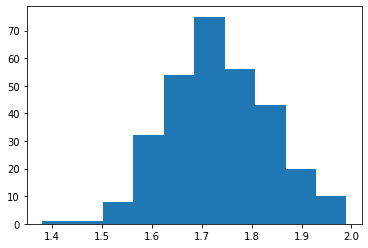

In [4]:
plt.hist(X1)
plt.show()

In [28]:
X1.mean().round(4)

1.7343

## Amostragem

Mas como garantir que a distribuição da variável na nossa amostra é significativamente parecida com a distribuição da variável na população geral. Existem várias técnicas clássicas de amostragem que tentam garantir isso:

- Amostragem Aleatória Simples

Todos os elementos da população tem uma chance igual de serem selecionados.

- Amostragem Estratificada

A distribuição de uma variável conhecida é mantida na amostra.

![](images_infer/estr_sample.png)

Na teoria de probabilidade, a ideia é pensar que cada uma das variáveis observadas é a observação de uma variável aleatória que tem distribuição igual a distribuição da população original. Quando tiramos uma amostra, estamos evaluando essas variáveis aleatórias.

**Definição** (amostra aleatória): Dizemos que o conjunto das variáveis aleatórias $X_1$, $\cdots$, $X_n$ é **amostra aleatória de $X$ tamanho $n$** se são independentes e identicamente distribuídas com distribuição igual à da variável aleatória $X$.

Em estatística paramétrica, estamos supondo que a distribuição de $X$ pode ser parametrizada por algum argumento $\theta\in\Theta\subset \mathbb{R}^n$.

Neste caso, qualquer **quantidade de interesse** da população é escrita como $g(\theta)$.

![](images_infer/amount_1.png)

![](images_infer/amount_2.png)

![](images_infer/amount_3.png)

Estamos fazendo perguntas sobre um atributo populacional que não podemos medir diretamente. Mas podemos medir na nossa amostra observada.

**Definição** (amostra observada): São os valores efetivamente observado após executar o experimento. Costuma ser denotado pela letra da variável aleatória minúscula

$$ \tilde{x} = (x_1,\cdots,x_n).$$

## Função de verossimilhança da amostra

**Definição** (função de verossimilhança): Seja $(X_1,\cdots,X_n)$ uma amostra aleatória de $X\sim f_{\theta}$, $\theta \in \Theta$. A função de verossimilhança é a função (densidade) de probabilidade calculada no $\tilde{x}$ observado. Neste caso, $\theta$ é o argumento.

$$ \mathscr{L}_{\tilde{x}}(\theta) = f_\theta(\tilde{x}) = \Pi_{i=1}^n f_\theta(x_i) , $$

ou

$$ \mathscr{L}_{\tilde{x}}(\theta) = P_\theta(\tilde{X} = \tilde{x}) = \Pi_{i=1}^n P_\theta(X_i = x_i)  . $$

Notação alternativa: $\mathscr{L}(\theta\,; \tilde{x}) $

Lembrando que a amostra aleatória implica em independência. Por isso podemos quebrar $\mathscr{L}_{\tilde{x}}$ na multiplicação.

In [6]:
theta = np.random.uniform(-1,1)
theta

-0.43986120432535625

$$ X \sim f_\theta(x) = \frac{1}{\sqrt{2\pi}} \,\exp\left({-\frac{(x-\theta)^2}{2}}  \right),\,\,\, \theta\in(-1,1)\subset\mathbb{R}$$

In [7]:
X2 = np.random.normal(theta,1,size=100)

In [8]:
# X2

In [9]:
def densidade_normal(theta, x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(x-theta)**2/2)

In [10]:
densidade_normal(0,0)

0.3989422804014327

In [11]:
def verossimilhanca(theta, vetor_x, densidade):
    aux = 1
    for x in vetor_x:
        aux*=densidade(theta,x)
    return aux

In [12]:
valores_theta = np.linspace(-1,1,1000)
ver = verossimilhanca(valores_theta, X2, densidade_normal)

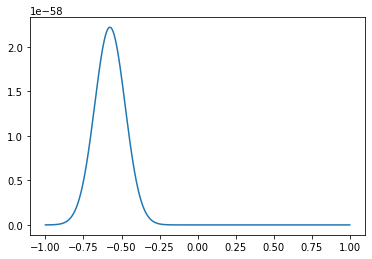

In [13]:
plt.plot(valores_theta, ver)
plt.show()

## Estimadores e estimativas

**Definição** (estimativa): Uma estatística é uma função da amostra aleatória.

![](images_infer/estimators.png)

Em que denoto a função indicadora tal que $\mathbb{1}(\textrm{True})=1$ e $\mathbb{1}(\textrm{False})=0$.

**Definição** (estimador pontual): Um **estimador** é uma estatística cujo objetivo é estimar uma quantidade $g(\theta)$.

**Definição** (estimativa): Uma estimativa é o valor numérico de um estimador que foi calculado usando a amostra observada.

![](images_infer/estimate.png)

Uma parte da estatística está interessada em construir estimadores com propriedades boas! Uma das técnicas é utilizar o método de máxima verossimilhança.

## Máxima verossimilhança

Neste método, encontramos o $\theta$ que melhor se adapta $\tilde{x}$ aos dados observados ,aos olhos da verossimilhança $\mathscr{L}_{\tilde{x}}(\theta)$. Isto é, o valor que máxima essa quantidade. Denotamos o $\theta$ estimado por $\widehat{\theta}_{MV}$. Com isso, conseguimos calcular a estimativa de máxima verossimilhança de $g(\theta)$ como $g(\widehat{\theta}_{MV})$.

Para achar o argumento $\theta$ que maximiza $\mathscr{L}_{\tilde{x}}(\theta)$ podemos usar várias estratégias de maximização. 

Usualmente, achamos a raíz da equação

$$ \frac{d}{d\theta} \mathscr{L}_{\tilde{x}}(\theta) = 0 .$$

Nem sempre isso é trivial, como $\mathscr{L}_{\tilde{x}}(\theta)\geq 0$ já que uma função densidade de probabilidade, podemos aplicar a função $\log(\cdot)$ (uma função monótona) e maximizar

$$ \log\left(  \mathscr{L}_{\tilde{x}}(\theta) \right)= \sum_{i=1}^n \log\left( f_\theta(x_i)  \right) .$$

Em outros casos pode ser preciso usar métodos numéricos para achar a raíz dessa equação.

**Exemplo**: Suponha que estamos analisando o tempo de ligações de uma determinada empresa. Por algum motivo é razoável querer entender qual a probabilidade das ligações demorarem entre 4 e 5 minutos.

Nos é fornecido a seguinte amostra aleatória de 20 elementos de tempo de ligações:

In [14]:
X3 = np.array([0.202, 5.3267, 0.8842, 1.8331, 0.5744, 0.1402,
               5.119, 3.1183, 5.569, 0.7165, 0.365, 0.2521,
               1.5503, 1.2344, 3.6096, 0.3423, 5.0797,
               7.9643, 0.2668, 3.3204])

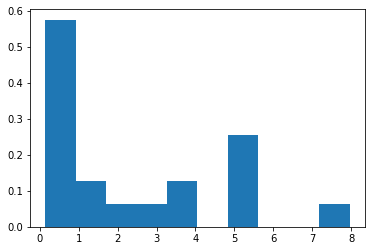

In [15]:
plt.hist(X3,density=True)
plt.show()

![](images_infer/estimator_prob_1.png)

In [16]:
(X3>4) & (X3<5)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [17]:
((X3>4) & (X3<5)).sum()

0

Podemos supor que os dados fazem parte de uma distribuição exponencial. A partir disso podemos estimar $\theta$ e calcular uma estimativa para $g(\theta)$.

![](images_infer/estimator_prob_2.png)

In [18]:
def densidade_exponencial(theta, x):
    return theta*np.exp(-theta*x)

In [19]:
valores_theta = np.linspace(0,2,1000)
ver = verossimilhanca(valores_theta, X3, densidade_exponencial)

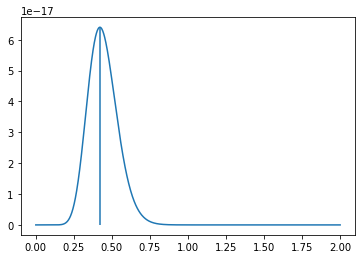

In [20]:
plt.plot(valores_theta, ver)
plt.vlines(valores_theta[np.argmax(ver)],np.min(ver),verossimilhanca(valores_theta[np.argmax(ver)], X3, densidade_exponencial))
plt.show()

In [21]:
valores_theta[np.argmax(ver)]

0.42042042042042044

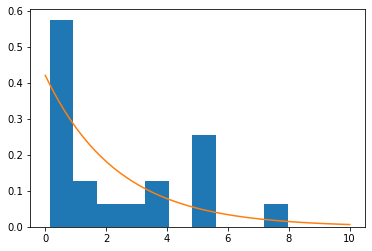

In [22]:
plt.hist(X3,density=True)
plt.plot(np.linspace(0,10),densidade_exponencial(valores_theta[np.argmax(ver)], np.linspace(0,10)))
plt.show()

In [23]:
np.exp(-4*valores_theta[np.argmax(ver)])-np.exp(-5*valores_theta[np.argmax(ver)])

0.06386153502253891

## Motivação para intervalos de confiança

Tudo bem, achamos uma estimativa **pontual** para nossa quantidade desejada $g(\theta)$. Sabemos que provavelmente esse não é o valor perfeito. Nossa estimativa depende da amostra que coletamos e existe uma aleatoriedade que nos diz que essa estimativa pode variar cada vez que realizamos o experimento. Em muitos casos, conseguimos estimar essas variações e calcular intervalos de confiaça que nos permitem acreditar que nossa quantidade desejada real está em um certo intervalo com alta probabilidade.

A partir desses intervalos, podemos construir testes de hipótese validando se nossas estimativas pontuais são razoáveis.

In [24]:
theta=3

In [25]:
np.random.normal(theta,1,size=50).mean()

2.9848781515052822

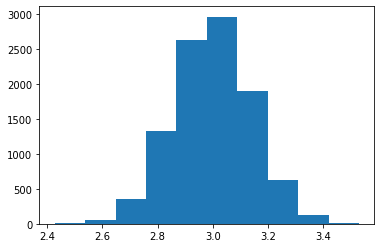

In [26]:
media_amostra = []
for i in range(10000):
    amostra = np.random.normal(theta,1,size=50)
    media_amostra.append(amostra.mean())
    
media_amostra=np.array(media_amostra)
plt.hist(media_amostra)
plt.show()

In [27]:
((media_amostra > 2.7) & (media_amostra<3.3)).sum()/10000

0.9671

obs: O valor de $\theta$ nos caracteriza unicamente a função (densidade) de probabilidade $f_\theta$ que postulamos fazer sentido. Em outros momentos, podemos não ter uma cara razoável para a função (densidade) de probabilidade e nesse contexto costumamos usar técnicas não paramétricas diferentes.

Uma boa introdução à esse problema é estudar sobre o KDE. https://youtu.be/x5zLaWT5KPs

![](images_infer/kde_1.jpg)
![](images_infer/kde_2.jpg)